In [ ]:
# 85594505 Mercury Mcindoe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Training Data Set
data1 = [
    [1, 1.25, 2.41],
    [2, 2.16, 5.98],
    [3, 0.00, 0.33],
    [4, 0.91, 0.97],
    [5, 0.44, 0.69],
    [6, 0.28, -0.29],
    [7, 0.56, 0.36],
    [8, 1.04, 1.25],
    [9, 1.19, 2.06],
    [10, 1.62, 3.09]
]

Training = pd.DataFrame(data1, columns = ['Sample ID', 'x', 'y'])

In [ ]:
# Calculate Analytical Solution for theta_1 * x + theta_0
def analyticalSolution(Training) :
  X_prev = Training['x'].values
  X_prev = X_prev.reshape(-1, 1)
  rows = X_prev.shape[0]
  one_column = np.ones((rows, 1))
  X = np.hstack((one_column, X_prev))

  X_T = X.T
  X_TX_INV = np.linalg.inv(X_T @ X)
  print(X_TX_INV)
  X_TY = X_T @ Training['y'].values
  print(X_TY)
  ret = X_TX_INV @ X_TY
  print(ret)
  return ret

Theta = analyticalSolution(Training)
Theta_0 = Theta[0]
Theta_1 = Theta[1]

[[ 0.3329438  -0.24650138]
 [-0.24650138  0.26084802]]
[16.85   25.9932]
[-0.79725653  2.62672649]


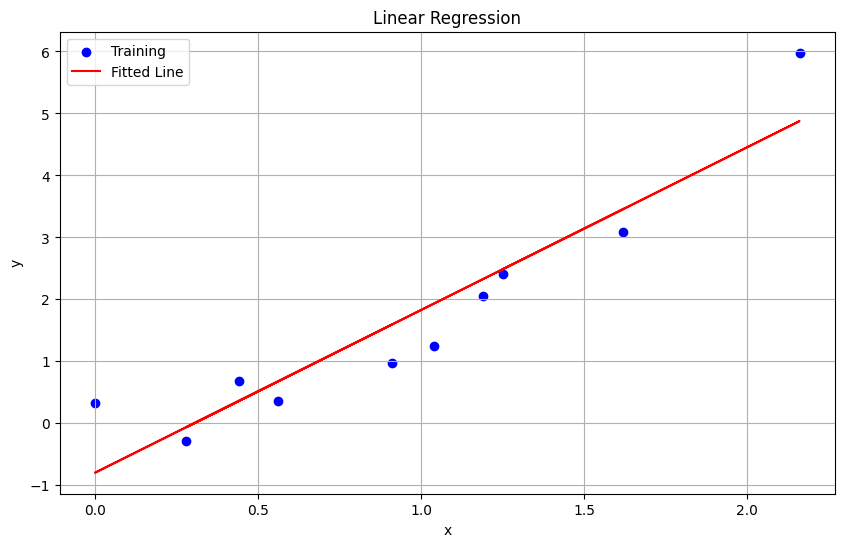

In [ ]:
# plot for Q1 - (a)
plt.figure(figsize=(10,6))
plt.scatter(Training['x'], Training['y'], color='blue', label = 'Training')
plt.plot(Training['x'],  Training['x']* Theta_1 + Theta_0, color='red', label = 'Fitted Line')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

[[ 0.60948222 -1.0636671   0.38834776]
 [-1.0636671   2.6755571  -1.14756019]
 [ 0.38834776 -1.14756019  0.54536358]]
[16.85     25.9932   45.071476]
[ 0.12507029 -0.09873162  1.29523977]


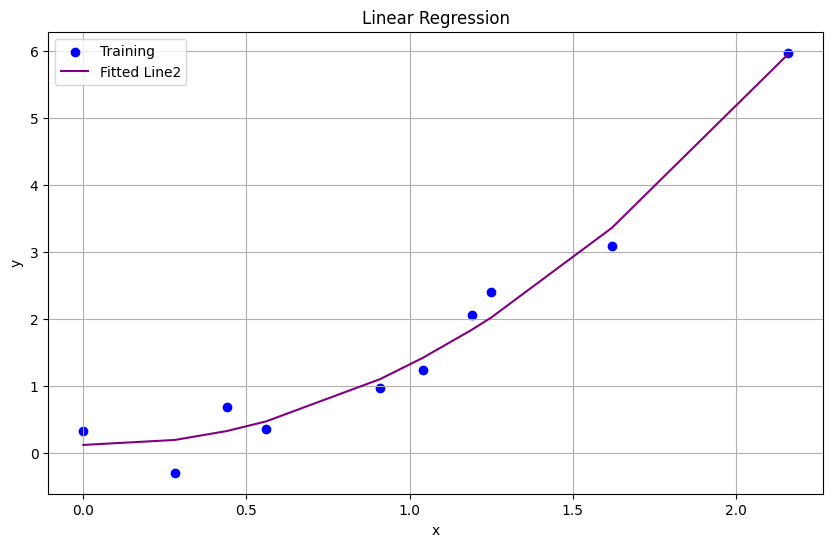

In [ ]:
# function to create analytical solution for corresonpding data set and order
def create_set(Training, terms) :
  x_val = Training['x'].values
  X = x_val.reshape(-1,1)

  one_column = np.ones((X.shape[0], 1))
  X = one_column

  for j in range(1, terms + 1):
      X_j = x_val**j
      X_j = X_j.reshape(-1, 1)
      X = np.hstack((X, X_j))

  return X

# Analytical Solution Calculator
def solutionFind(Training, X) :
  X_T = X.T
  X_TX_INV = np.linalg.inv(X_T @ X)
  print(X_TX_INV)
  X_TY = X_T @ Training['y'].values
  print(X_TY)
  ret = X_TX_INV @ X_TY
  print(ret)
  return ret

secondSET = create_set(Training, 2)
theta_2 = solutionFind(Training, secondSET)

# sort indices for proper plot generation
sorted_indices = Training['x'].argsort()
x_sorted = Training['x'][sorted_indices]
y_sorted = Training['y'][sorted_indices]

plt.figure(figsize=(10,6))
plt.scatter(x_sorted, y_sorted, color='blue', label='Training')
plt.plot(x_sorted, (x_sorted ** 2) * theta_2[2] + x_sorted * theta_2[1] + theta_2[0], color='purple', label='Fitted Line2')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



[[   0.96599089   -4.59071285    6.8258027    -3.99416183    0.79760766]
 [  -4.59071285   45.67860831  -92.03064007   64.15248741  -14.31330643]
 [   6.8258027   -92.03064007  207.99298074 -154.74906878   35.9413164 ]
 [  -3.99416183   64.15248741 -154.74906878  119.60252763  -28.44875276]
 [   0.79760766  -14.31330643   35.9413164   -28.44875276    6.87100131]]
[ 16.85        25.9932      45.071476    83.8329789  163.65565426]
[ 0.28915117 -2.33650044  6.31881531 -3.7052006   0.85375681]


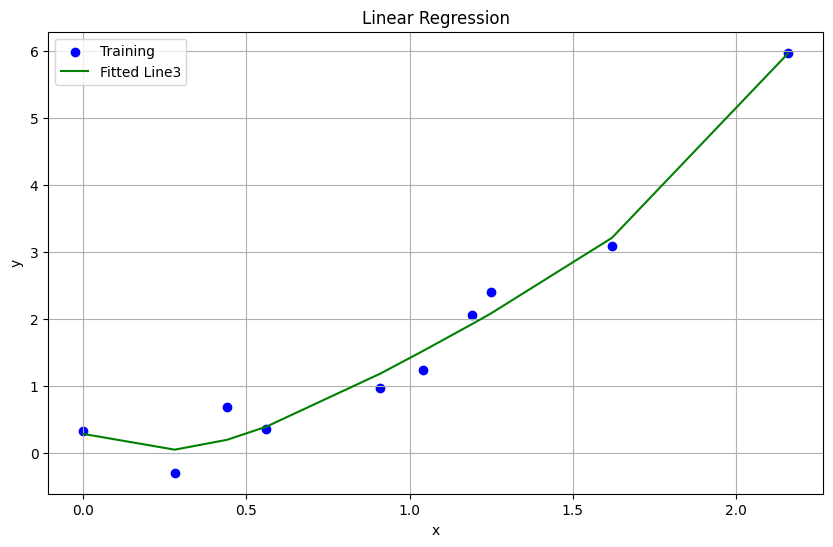

In [ ]:
thirdSET = create_set(Training, 4)
theta_3 = solutionFind(Training, thirdSET)

plt.figure(figsize=(10,6))
plt.scatter(x_sorted, y_sorted, color='blue', label='Training')
plt.plot(x_sorted, (x_sorted ** 4) * theta_3[4] + (x_sorted ** 3) * theta_3[3] + (x_sorted ** 2) * theta_3[2] + x_sorted * theta_3[1] + theta_3[0], color='green', label='Fitted Line3')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

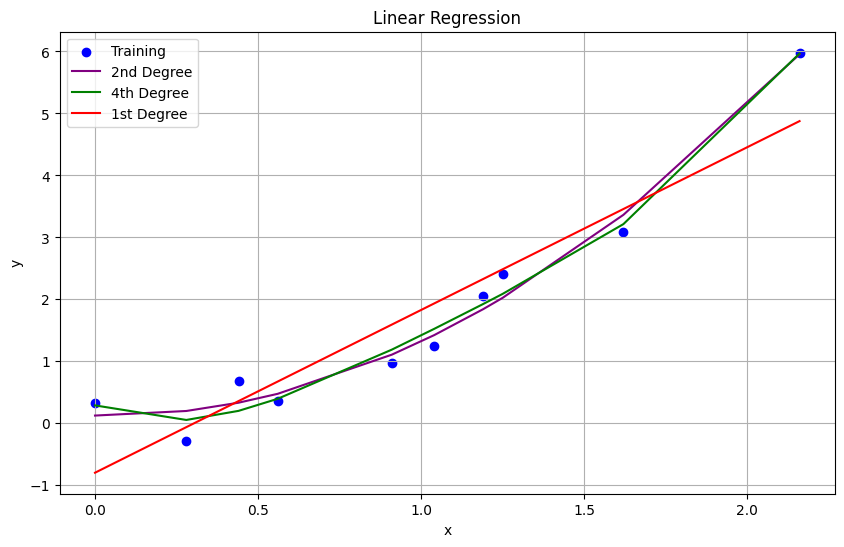

In [ ]:
# sort data points for proper plot generation
sorted_indices = Training['x'].argsort()
x_sorted = Training['x'][sorted_indices]
y_sorted = Training['y'][sorted_indices]

plt.figure(figsize=(10, 6))

plt.scatter(x_sorted, y_sorted, color='blue', label='Training')
# comprehensive plot for answers from Q.1 (a) - (c)
plt.plot(x_sorted, (x_sorted ** 2) * theta_2[2] + x_sorted * theta_2[1] + theta_2[0], color='purple', label='2nd Degree')
plt.plot(x_sorted, (x_sorted ** 4) * theta_3[4] + (x_sorted ** 3) * theta_3[3] + (x_sorted ** 2) * theta_3[2] + x_sorted * theta_3[1] + theta_3[0], color='green', label='4th Degree')
plt.plot(x_sorted, x_sorted * Theta_1 + Theta_0, color='red', label='1st Degree')

plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Testing Data Set
data2 = [
    [0, 2.63, 9.30],
    [1, 2.68, 9.71],
    [2, 0.26, 0.22],
    [3, 0.12, 0.21],
    [4, 0.51, 0.38],
    [5, 2.63, 9.434],
    [6, 0.30, 0.23],
    [7, 1.26, 2.01],
    [8, 2.87, 11.28],
    [9, 1.60, 3.29]
]

Testing = pd.DataFrame(data2, columns = ['Sample ID', 'x', 'y'])

# function for calculating MAE, MSE, RMSE, R-square for linear model based on Testing data set
def r_table(Testing, linearModel) :
  y_bar = sum(i[2] for i in data2) / len(data2)

  R_square_table = pd.DataFrame(columns = ['x', 'y', 'y - avg(y)', '(y - avg(y))^2', 'y_hat', 'y - y_hat', '(y - y_hat)^2'])

  R_square_table['x'] = Testing['x']
  R_square_table['y'] = Testing['y']

  R_square_table['y - avg(y)'] = Testing['y'] - y_bar
  R_square_table['(y - avg(y))^2'] = R_square_table['y - avg(y)'] ** 2

  if (len(linearModel) == 2) : # 1st order
    theta_0 = linearModel[0]
    theta_1 = linearModel[1]

    R_square_table['y_hat'] = R_square_table['x'] * theta_1 + theta_0

  elif (len(linearModel) == 3) : # 2nd order
    theta_0 = linearModel[0]
    theta_1 = linearModel[1]
    theta_2 = linearModel[2]

    R_square_table['y_hat'] = (R_square_table['x'] ** 2) * theta_2 + R_square_table['x'] * theta_1 + theta_0

  else : # 4th order
    theta_0 = linearModel[0]
    theta_1 = linearModel[1]
    theta_2 = linearModel[2]
    theta_3 = linearModel[3]
    theta_4 = linearModel[4]


    R_square_table['y_hat'] = (R_square_table['x'] ** 4) * theta_4+ (R_square_table['x'] ** 3) * theta_3 + (R_square_table['x'] ** 2) * theta_2 + R_square_table['x'] * theta_1 + theta_0

  R_square_table['y - y_hat'] = R_square_table['y'] - R_square_table['y_hat']
  R_square_table['(y - y_hat)^2'] = R_square_table['y - y_hat'] ** 2

  MAE = R_square_table['y - y_hat'].abs().sum() / len(Testing)
  MSE = R_square_table['(y - y_hat)^2'].sum() / len(Testing)
  RMSE = math.sqrt(MSE)
  R_square = 1 - R_square_table['(y - y_hat)^2'].sum() / R_square_table['(y - avg(y))^2'].sum()
  print(R_square_table['(y - y_hat)^2'].sum())
  print(R_square_table['(y - avg(y))^2'].sum())
  print(R_square_table)

  return {'MAE' : MAE , 'MSE' : MSE , 'RMSE' : RMSE , 'R-square' : R_square, 'table' : R_square_table}

# function for plotting R-square
def plot(model) :
  sorted_indices = Testing['x'].argsort()
  x_sorted = Testing['x'][sorted_indices]
  y_sorted = model['table']['y'][sorted_indices]
  yhat_sorted = model['table']['y_hat'][sorted_indices]


  plt.figure(figsize = (10, 6))
  plt.scatter(x_sorted, y_sorted, color = 'green', label = 'original')
  plt.scatter(x_sorted, yhat_sorted, color = 'brown', label = 'predicted')
  plt.text(1, 4, f"R-square = {model['R-square']}", fontsize = 12, color = 'black')

54.77457054921184
199.9776464
      x       y  y - avg(y)  (y - avg(y))^2     y_hat  y - y_hat  \
0  2.63   9.300      4.6936       22.029881  6.111034   3.188966   
1  2.68   9.710      5.1036       26.046733  6.242370   3.467630   
2  0.26   0.220     -4.3864       19.240505 -0.114308   0.334308   
3  0.12   0.210     -4.3964       19.328333 -0.482049   0.692049   
4  0.51   0.380     -4.2264       17.862457  0.542374  -0.162374   
5  2.63   9.434      4.8276       23.305722  6.111034   3.322966   
6  0.30   0.230     -4.3764       19.152877 -0.009239   0.239239   
7  1.26   2.010     -2.5964        6.741293  2.512419  -0.502419   
8  2.87  11.280      6.6736       44.536937  6.741448   4.538552   
9  1.60   3.290     -1.3164        1.732909  3.405506  -0.115506   

   (y - y_hat)^2  
0      10.169503  
1      12.024455  
2       0.111762  
3       0.478932  
4       0.026365  
5      11.042102  
6       0.057235  
7       0.252425  
8      20.598450  
9       0.013342  
1.4994217382

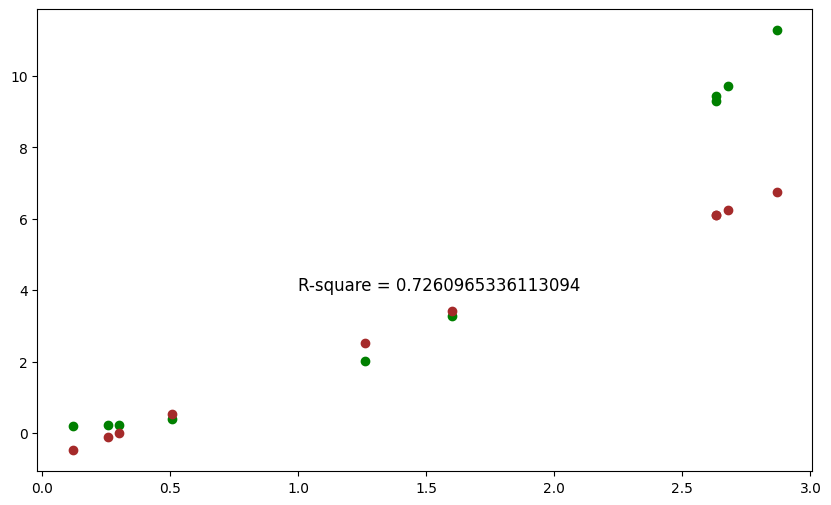

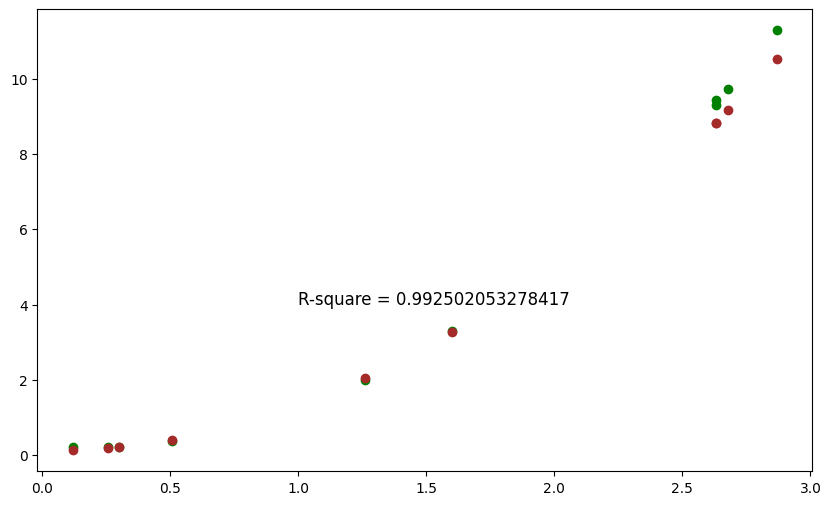

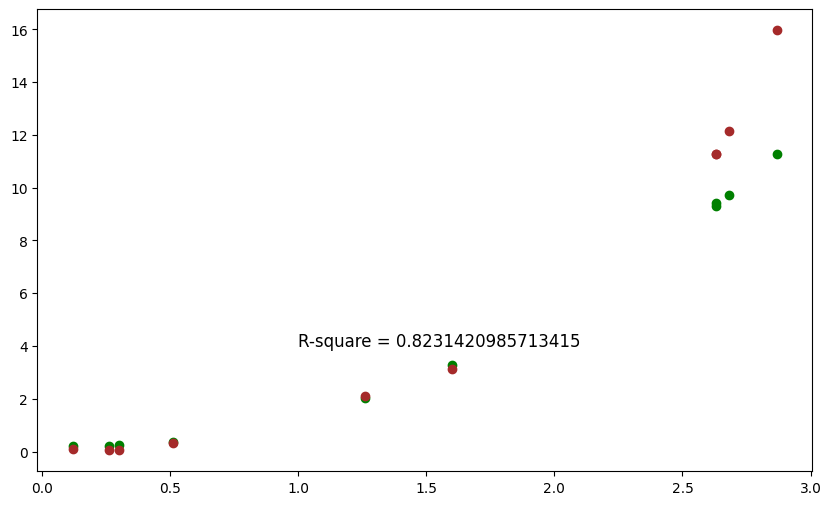

In [ ]:
modelOne = r_table(Testing, Theta)
modelTwo = r_table(Testing, theta_2)
modelThree = r_table(Testing, theta_3)

# plots for R-squares based on linear model
plot(modelOne)
plot(modelTwo)
plot(modelThree)